# PVT корреляции

Для модели нелетучей нефти свойства пластовых флюидов чаще всего описываются с использованием набора корреляций


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sympy import *
init_printing()
import PVT_correlations as PVT

# Содержание

1. [Давление насыщения нефти газом](#Pb)

    1.1 [Давление насыщения, корреляция Стендинга](#Pb_Standing)
    
    1.2 [Давление насышения, корреляция Валко Маккейн](<#Pb_Valco)
    
----

## Давление насыщения нефти газом
<a id="Pb"></a>

### Давление насыщения, корреляция Стендинга
<a id="Pb_Standing"></a>

Корреляция Стендинга для оценки давления насыщения нефти газом. 

$$ P_b =  0.5197  \left( \frac{R_{sb}}{\gamma_g}\right)^{0.83} 10 ^{y_g} $$

где

$P_b$ - давление насыщения, $МПа$ 

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3 $

$\gamma_g$ - относительная плотность газа, безразмерная величина  

$y_g$ - мольная доля газа, $ y_g = 1.225 +0.00164 T - \frac{ 1.769}{\gamma_o}$

$\gamma_o$ - относительная плотность нефти, безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


 
 


ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

---

In [7]:
# Корреляция Стендинга для давления насыщения реализована 
# в виде функции unf_pb_Standing_MPaa в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

PVT.unf_pb_Standing_MPaa??

в приведеном коде использована коррекция значений давления насыщения при низких значениях газосодержания при давлении насыщения для обеспечения выхода на значение $P_b = 1$ при $R{sb} = 0$

<img  src="pics/Pb-Standing_comparison.png" width="600"  >

---
Построим пару графиков, используя приведенную функцию

In [4]:
# параметры определяющие дипазоны значений для построения графиков
rsb_set=np.arange(1,300,10)
t_set=np.arange(273,380,30)
t_set_def=np.array([313])
gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
# функция для автоматизации построения графиков по давлению насыщения
def prep_plot(func,tset,goset,ggset,plot_title,plot_xlab,plot_ylab):
    for t in tset:
        for gg in ggset:
            for go in goset:
                pb_set=[]
                for rsb in rsb_set:
                    pb_set.append(func(rsb,t_K = t,gamma_gas = gg,gamma_oil = go))
                plt.plot(rsb_set, pb_set, label='t = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                                 ' $\gamma_g$ = %1.2f'%gg + 
                                                 ' $\gamma_o$ = %1.2f'%go)
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()


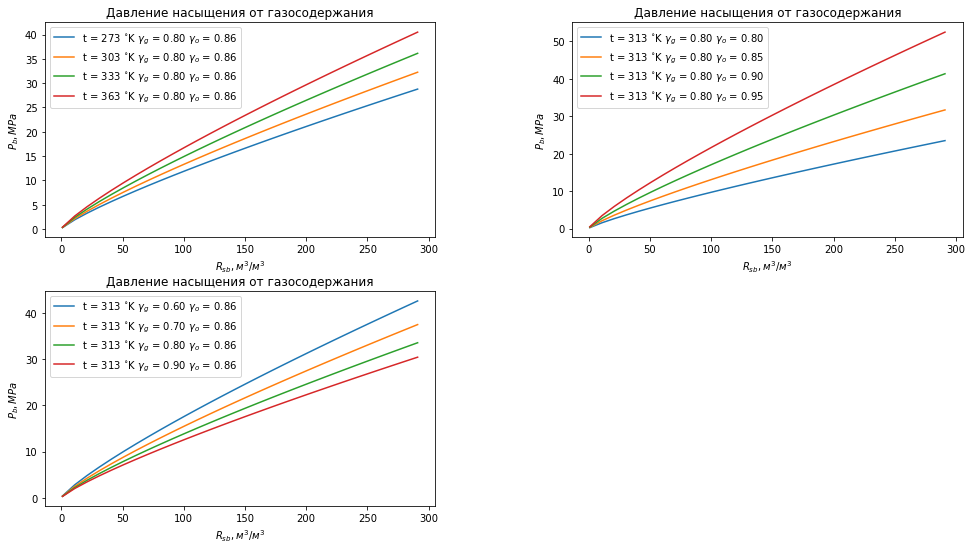

In [5]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = PVT.unf_pb_Standing_MPaa
# рисуем первый график
plt.subplot(221)
prep_plot(f,t_set,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')
# рисуем второй график
plt.subplot(222)
prep_plot(f,t_set_def,go_set,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')
# рисуем третий график
plt.subplot(223)
prep_plot(f,t_set_def,go_set_def,gg_set,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.show()


---
<a id="Pb_Valco"></a>
### Давление насыщения, корреляция Valko McCain


Корреляция Valco McCain (2003) для оценки давления насыщения нефти газом разработана на основе банка данных нефтей со всего мира. На рисунке показаны источники данных, которые были использованы авторами для настройки корреляции.  

<img  src="pics/McCain_corr_sources.png" width="400"  >


Диапазоны значений основных свойств (1745 значений), использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Мин|Среднее|Макс|
| :--- | :---: |:---:|:---:|
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.55  |15.0|45.5|
| <p align="left"> температура, $^{\circ}\mathrm{С} $ | 15 |85|172|
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 2 |104|395|
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.724  |0.846|1.02|
| <p align="left"> относительная плотность газа на сепараторе, $\gamma_g$  | 0.555  |0.838|1.685|
    
По результатам сравнений с замеренными значениями абсолютная значение средней относительной ошибки (AARE) для корреляции составляет около 11%. Авторы отмечают, что полученная точность соответствует точности замеров использованных для построения корреляции и для построения более точных зависимостей потребуется сбор новых данных с повышенной точностью.

$$
ln P_b = 7.475 + 0.713 z + 0.0075 z^2
$$
где 

$$
z = z_1+z_2+z_3+z_4
$$
$$
z_1 = -5.48 - 0.0375\cdot ln R_{sb}+0.281\cdot (ln R_{sb})^2 - 0.0206\cdot (ln R_{sb})^3
$$
$$
z_2 = 1.27 - 0.0449\cdot API +4.36 \cdot 10^{-4} API^2 -4.76 \cdot 10^{-6} API^3
$$
$$
z_3 = 4.51 - 10.84 \cdot \gamma_{gSP} +8.39\cdot \gamma_{gSP}^2 -2.34\cdot \gamma_{gSP}^3
$$
$$
z_4 = -0.7835 + 6.23 \cdot 10^{-3} \cdot T_R - 1.22 \cdot 10^{-5} \cdot T_R^2+ 1.03 \cdot 10^{-8} \cdot T_R^3
$$

где

* $p_b$ - давление насыщения, $psia$
* $R_{sb}$ - газосодержание при давлении насыщения, ${scf}/{STB}$
* $\gamma_{gSP}$ - удельная плотность газа, отобранного на сепараторе, безразмерная величина
* $T_R$ - пластовая температура, $F$


ref Reservoir oil bubblepoint pressures revisited; solution gas-oil ratios and surface gas specific gravities. P.P.Valko, W.D.McCain Jr. Journal of petroleum science and engineering 37(2003) 153-169

---
#### Пребразование единиц измерения для корреляции Валко Маккейна

In [6]:
# объявления переменных необходимых для преобразования единиц в вырожении
rsb_scfSTB, rsb_m3m3 = symbols('R_sb[scfSTB] R_sb[m3m3]')
API, gamma_o = symbols('API gamma_o')
gamma_gSP = symbols('gamma_gSP')
T_RF,T_RK = symbols('T_R[F] T_R[K]')
z,z1,z2,z3,z4 = symbols('z,z1,z2,z3,z4')
p_bpsia, p_bMPaa = symbols('p_b[psia],p_b[MPaa]')

In [7]:
# определение алгоритма расчета в американских промысловых единицах
eq1 = Eq(z,z1+z2+z3+z4)
eq2 = Eq(z1,  -5.48 - 0.03758 * ln(rsb_scfSTB)+ 0.281*  ln(rsb_scfSTB)**2 - 0.0206* ln(rsb_scfSTB)**3)
eq3 = Eq(z2,  1.27 - 0.0449* API +4.36 * 10**-4 *API**2 -4.76 * 10**-6 *API**3)
eq4 = Eq(z3,  4.51- 10.84 *gamma_gSP +8.39*gamma_gSP**2 -2.34*gamma_gSP**3 )
eq5 = Eq(z4,  -0.7835 + 6.23 * 10**-3 * T_RF - 1.22 * 10**-5 * T_RF**2+ 1.03 * 10**-8 * T_RF**3)
eq6 =Eq(ln(p_bpsia),(7.475 + 0.713 * z + 0.0075 * z**2))
# покажем выражения в печатном виде
display(eq6)
display(eq1)
display(eq2)
display(eq3)
display(eq4)
display(eq5)

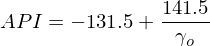

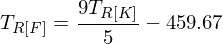

In [8]:
# выражения для преобразования единиц измерения из американских промысловых в практические метрические
scfSTB_to_m3m3 = rsb_m3m3/0.178107606679035
API_to_gamma_o = 141.5/gamma_o-131.5
F_to_K = T_RK*9/5-459.67
psi_to_MPa = p_bMPaa * 14.6959 * 10.1325
# покажем выражения в печатном виде
display(Eq(rsb_scfSTB , scfSTB_to_m3m3))
display(Eq(API,API_to_gamma_o))
display(Eq(T_RF,F_to_K))
display(Eq(p_bpsia,psi_to_MPa))

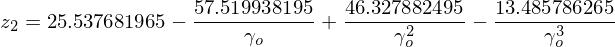

In [9]:
# преобразование алгоритма в метрические единцы с использованием символьных вычислений
eq2_m=simplify(eq2.subs(rsb_scfSTB,scfSTB_to_m3m3))
eq3_m=simplify(eq3.subs(API,API_to_gamma_o))
eq5_m=simplify(eq5.subs(T_RF,F_to_K))
eq6_m=eq6.subs(p_bpsia, psi_to_MPa)
eq8=solve(eq6_m,p_bMPaa)
eq9=Eq(p_bMPaa, eq8[0])
# вывод результатов преобразований
display(eq9)
display(eq1)
display(eq2_m)
display(eq3_m)
display(eq4)
display(eq5_m)

In [10]:
# расчет реализован в функции  unf_pb_Valko_MPaa
PVT.unf_pb_Valko_MPaa??

Signature: PVT.unf_pb_Valko_MPaa(rsb_m3m3, gamma_oil=0.86, gamma_gas=0.6, t_K=350)
Source:   
def unf_pb_Valko_MPaa(rsb_m3m3, gamma_oil=0.86, gamma_gas=0.6, t_K=350):
    """
    bubble point pressure calculation according to Valko McCain (1998) correlation

    ref SPE 51086 "CORRELATION OF BUBBLEPOINT PRESSURES FOR RESERVOIR OILS A COMPARATIVE STUDY"
    W. D. McCain Jr., R. B. Soto, P.P. Valko, and T. A. Blasingame

    return bubble point pressure abs in MPa
    rsb_m3m3,       solution ration at bubble point, must be given, m3/m3
    gamma_oil=0.86, specific gas density (by water)
    gamma_gas=0.6,  specific gas density (by air)
    t_K=350         temperature, K
    """

    min_rsb = 1.8
    max_rsb = 800
    rsb_old = rsb_m3m3
    if rsb_m3m3 < min_rsb:
        rsb_m3m3 = min_rsb
    if rsb_m3m3 > max_rsb:
        rsb_m3m3 = max_rsb

    z1 = -4.81413889469569 + 0.748104504934282 * np.log(rsb_m3m3) \
         + 0.174372295950536 * np.log(rsb_m3m3) ** 2 - 0.0206 * np.log(rsb_m3

в приведеном коде использована коррекция значений давления насыщения при низких значениях газосодержания при давлении насыщения для обеспечения выхода на значение $P_b = 1$ при $R{sb} = 0$ и при больших значениях газосодержания

<img  src="pics/Pb-Valko_comparison.png" width="600"  >

следует отметить, что в отличии от корреляций типа Стендинга корреляция Валко Макейна хорошо описывает исходный набор данных в пределах области применимости, но дает нефизичные результаты за пределами диапазона применимости. Приведенная в коде корректировке может частично сгладить экспраполированные значения, но лучше при проведении расчетов контролировать, чтобы корреляция применялась в пределах диапазона примемости. 

---
Построим пару графиков, используя приведенную функцию

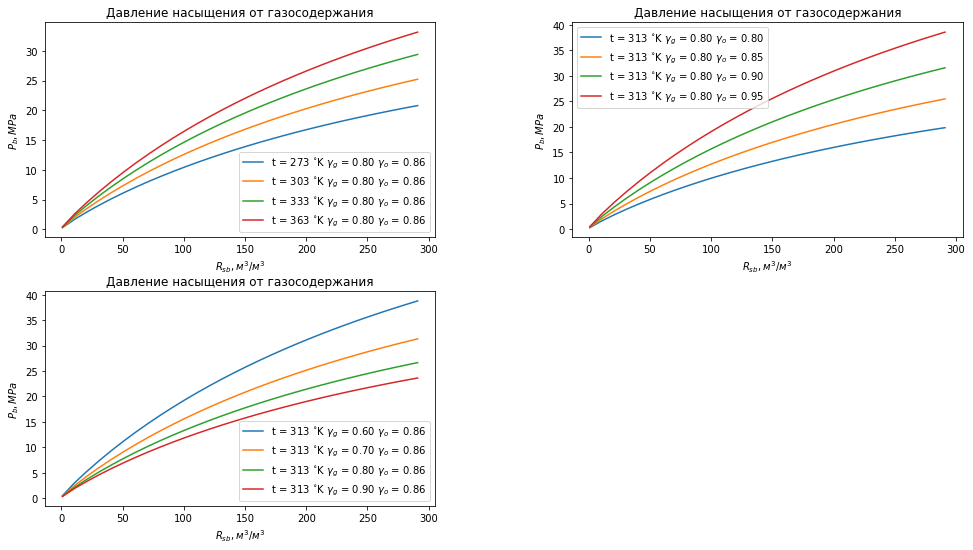

In [11]:
plt.figure(figsize=(15,8))
f = PVT.unf_pb_Valko_MPaa
# рисуем первый график
plt.subplot(221)
prep_plot(f,t_set,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')
# рисуем второй график
plt.subplot(222)
prep_plot(f,t_set_def,go_set,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')
# рисуем третий график
plt.subplot(223)
prep_plot(f,t_set_def,go_set_def,gg_set,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.show()


## Газосодержание
<a id="Rs"></a>

### Газосодержание, корреляция Стендинга
<a id="Rs_Standing"></a>

Для расчета газосодержания используется корреляция, обратная корреляции Стендинга для давления насыщения нефти газом. 

$$ R_s =  \gamma_g  \left( \frac{1.92 p}{\ 10^{y_g}}\right)^{1.204} $$

где:

$R_s$ - газосодержание, $м^3/м^3 $

$P$ - давление, $МПа$ 

$\gamma_g$ - относительная плотность газа, безразмерная величина  

$y_g$ - мольная доля газа, $ y_g = 1.225 +0.00164 T - \frac{ 1.769}{\gamma_o}$

$\gamma_o$ - относительная плотность нефти, безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$

Газосодержание является одним из ключевых свойств нефти при расчётах производительности скважин и работы скважинного оборудования. Динамика изменения газосодержания во многом определяет количество свободного газа в потоке и должна учитываться при проведении расчётов.

Если известно газосодержание при давлении насыщения, то газосодержание при давлениях ниже давления насыщения может быть получено из пропорции:

$$ R_s =  \ R_{sb}\left( \frac{p}{\ P_b}\right)^{1.204} $$

где:

$R_s$ - газосодержание, $м^3/м^3 $

$P$ - давление, $МПа$ 

$P_b$ - давление насыщения, $МПа$

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3 $

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


 
 


ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

---

In [9]:
# Корреляция Стендинга для газосодержания реализована 
# в виде функции unf_Rs_Standing_m3m3 в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

PVT.unf_Rs_Standing_m3m3??

Object `PVT.unf_Rs_Standing_m3m3` not found.
